<a href="https://colab.research.google.com/github/tomersk/learn-python/blob/main/05_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 5.2 Theoretical distributions
Theoretical distributions are based upon mathematical formulas rather than empirical observations. There are various types of theoretical distributions, commonly used are: Normal, Uniform, Exponential, and Poisson. The parameters of distributions are termed as location, scale, and shape parameter. The location parameter is the one, who change the location of pdf without affecting other attributes. Shape parameter is the one, who change the shape of distribution without affecting
other attributes. The parameter which stretch or shrink the distribution is called the scale parameters.
First we will generate normally distributed random variables. The input required for this are location
and scale parameter, which are mean and standard deviation in case of normal distribution. We can
also use *np.random.randn* to generate normally distributed random variables, but *scipy.stats*
provides many other utilities (methods). So we shall use *scipy.stats* library.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

# generate instances of normaly distributed random variable
rv1 = st.norm(loc=0, scale=5)
rv2 = st.norm(loc=0, scale=3)
rv3 = st.norm(loc=0, scale=7)

Now these instances of variables can be used to evaluate PDF at any value. In the following example, we are computing pdf from -50 to 50 for plotting purpose.

In [7]:
x = np.linspace(-50,50, 1000)
y1 = rv1.pdf(x)
y2 = rv2.pdf(x)
y3 = rv3.pdf(x)

Now, we have estimated PDF, it can be plotted. On the x−axis we will keep the variable, and
on the y−axis keep the PDF. We are also supplying additional argument lw to plot function,
which represents line width, and is used to control the widths of the plot. Below figure shows the
PDF for three normally distributed random variables with varying scale parameters. The figure illustrates the effect of scale parameter on the PDF. In case of less scale parameter, more mass of
pdf is concentrated in the center, as the scale parameter is increasing, the spread is increasing.

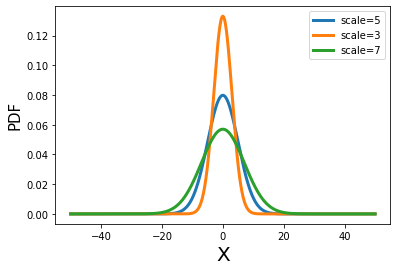

In [8]:
plt.plot(x, y1, lw=3, label='scale=5')
plt.plot(x, y2, lw=3, label='scale=3')
plt.plot(x, y3, lw=3, label='scale=7')
plt.xlabel('X', fontsize=20)
plt.ylabel('PDF', fontsize=15)
plt.legend()
plt.show()

We can use same instance to also get the CDF. The cdf method gives the CDF at given input, which could be a scalar or an array. The CDF is shown in the below figure. CDF also shows the effect of scale parameter, but PDF provides a better inside. Hence it is always better to plot PDF to see the behaviour of the distribution or of the empirical data.

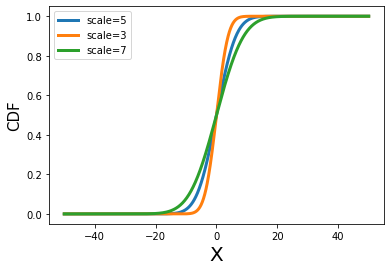

In [10]:
y1 = rv1.cdf(x)
y2 = rv2.cdf(x)
y3 = rv3.cdf(x)

# plot the CDF
plt.plot(x, y1, lw=3, label='scale=5')
plt.plot(x, y2, lw=3, label='scale=3')
plt.plot(x, y3, lw=3, label='scale=7')
plt.xlabel('X', fontsize=20)
plt.ylabel('CDF', fontsize=15)
plt.legend()
plt.show()

There are other quiet commonly used distributions in hydrology, e.g. Cauchy, Chi, Exponential and Uniform etc. Let us, play with them also. First we will generate instance of these distributions. Chi distribution also require degree of freedom parameter apart from the location and scale parameters.
In case of uniform distribution, the location parameter is defined as lower range, and scale parameter is defined as upper range, which is not true mathematically, and is defined just to make things easier
in providing input to function. Below figure shows the PDF for these distribution.

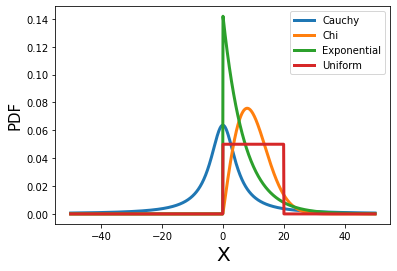

In [11]:
rv1 = st.cauchy(loc=0, scale=5)
rv2 = st.chi(2, loc=0, scale=8)
rv3 = st.expon(loc=0, scale=7)
rv4 = st.uniform(loc=0, scale=20)

# compute pdf
y1 = rv1.pdf(x)
y2 = rv2.pdf(x)
y3 = rv3.pdf(x)
y4 = rv4.pdf(x)

# plot the pdf
plt.plot(x, y1, lw=3, label='Cauchy')
plt.plot(x, y2, lw=3, label='Chi')
plt.plot(x, y3, lw=3, label='Exponential')
plt.plot(x, y4, lw=3, label='Uniform')
plt.xlabel('X', fontsize=20)
plt.ylabel('PDF', fontsize=15)
plt.legend()
plt.show()

We generate a number of random variable from some distribution to represent the distribution. To
explore the impact of the number of samples on the empirical distribution, we will generate random
number from same distribution but with various number of samples, and see how it is effecting
the empirical distribution. We will not be using any quantitative measure to check this, as till this
stage we have not talked about them, rather we will just visualize graphically. First we will play
with normal distribution which is most commonly used distribution. We will use hist function
of the matplotlib.pyplot library to compute the PDF. We are specifying *density=True* for the hist
function, which means that the area of histogram should be made equal to one, and which happens to
be the PDF. We are also using *plt.axis* to specify the limits of the plot, and we are keeping it same so that we can compare plots easily. The argument for *plt.axis* are [xmin, xmax, ymin, ymax]. Below figure shows the empirical and theoretical PDF for sample equal to 100, 1000, 10,000, and 100,000.
It is clear from the figure that as the number of sample are increasing, the empirical distribution is
approaching near to theoretical one. At 100 sample, the distribution is represented very poorly by
the data, while in other case it is relatively better.

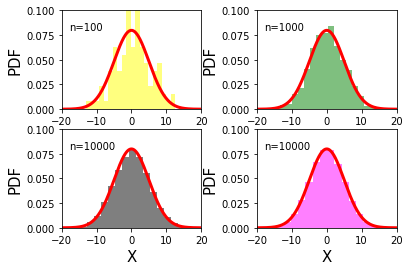

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

# normal distribution
rv = st.norm(loc=0, scale=5)

x1 = np.linspace(-20, 20, 1000)
y1 = rv.pdf(x1)

# compute and plot pdf
fig = plt.figure()
fig.subplots_adjust(wspace=0.4)

plt.subplot(2,2,1)
x = rv.rvs(size=100)
n, bins, patches = plt.hist(x, 20, density=True, facecolor='yellow', alpha=0.5)
plt.plot(x1, y1, 'r', lw=3)
plt.xlabel('X', fontsize=15)
plt.ylabel('PDF', fontsize=15)
plt.axis([-20, 20, 0, 0.10])
plt.text(-18,0.08,'n=100')

plt.subplot(2,2,2)
x = rv.rvs(size=1000)
n, bins, patches = plt.hist(x, 20, density=True, facecolor='green', alpha=0.5)
plt.plot(x1, y1, 'r', lw=3)
plt.xlabel('X', fontsize=15)
plt.ylabel('PDF', fontsize=15)
plt.axis([-20, 20, 0, 0.10])
plt.text(-18,0.08,'n=1000')

plt.subplot(2,2,3)
x = rv.rvs(size=10000)
n, bins, patches = plt.hist(x, 20, density=True, facecolor='black', alpha=0.5)
plt.plot(x1, y1, 'r', lw=3)
plt.xlabel('X', fontsize=15)
plt.ylabel('PDF', fontsize=15)
plt.axis([-20, 20, 0, 0.10])
plt.text(-18,0.08,'n=10000')

plt.subplot(2,2,4)
x = rv.rvs(size=100000)
n, bins, patches = plt.hist(x, 20, density=True, facecolor='magenta', alpha=0.5)
plt.plot(x1, y1, 'r', lw=3)
plt.xlabel('X', fontsize=15)
plt.ylabel('PDF', fontsize=15)
plt.axis([-20, 20, 0, 0.10])
plt.text(-18,0.08,'n=10000')

plt.show()

We can also see the effect of the number of sample on the empirical distribution apart from the
normal distribution, say Laplace distribution. In this example, we are controlling the limits of the
axis using the plt.xlim and plt.ylim separately. In case of y−axis we are only defining ymax to
control the maximum limit of the axis, while for x−axis we are defining both the limits. The limit
of the axis could have been fixed using the axis as used in the last example, this is just to show
that we can control only one limit, and leave the other limit to plt. Below figure shows the empirical
and theoretical PDF for various number of samples.

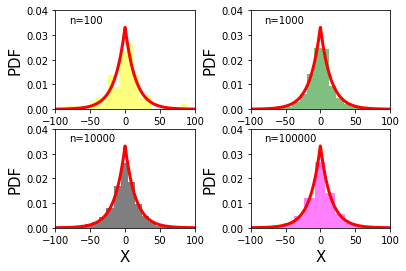

In [17]:
rv = st.laplace(loc=0, scale=15)
x1 = np.linspace(-100, 100, 1000)
y1 = rv.pdf(x1)

# compute and plot pdf
fig = plt.figure()
fig.subplots_adjust(wspace=0.4)

plt.subplot(2,2,1)
x = rv.rvs(size=100)
n, bins, patches = plt.hist(x, 20, density=True, facecolor='yellow', alpha=0.5)
plt.plot(x1, y1, 'r', lw=3, label='scale=5')
plt.xlabel('X', fontsize=15)
plt.ylabel('PDF', fontsize=15)
plt.ylim(ymax=0.04)
plt.xlim((-100,100))
plt.text(-80,0.035,'n=100')

plt.subplot(2,2,2)
x = rv.rvs(size=1000)
n, bins, patches = plt.hist(x, 20, density=True, facecolor='green', alpha=0.5)
plt.plot(x1, y1, 'r', lw=3, label='scale=5')
plt.xlabel('X', fontsize=15)
plt.ylabel('PDF', fontsize=15)
plt.ylim(ymax=0.04)
plt.xlim((-100,100))
plt.text(-80,0.035,'n=1000')

plt.subplot(2,2,3)
x = rv.rvs(size=1000)
n, bins, patches = plt.hist(x, 20, density=True, facecolor='black', alpha=0.5)
plt.plot(x1, y1, 'r', lw=3, label='scale=5')
plt.xlabel('X', fontsize=15)
plt.ylabel('PDF', fontsize=15)
plt.ylim(ymax=0.04)
plt.xlim((-100,100))
plt.text(-80,0.035,'n=10000')

plt.subplot(2,2,4)
x = rv.rvs(size=10000)
n, bins, patches = plt.hist(x, 20, density=True, facecolor='magenta', alpha=0.5)
plt.plot(x1, y1, 'r', lw=3, label='scale=5')
plt.xlabel('X', fontsize=15)
plt.ylabel('PDF', fontsize=15)
plt.ylim(ymax=0.04)
plt.xlim((-100,100))
plt.text(-80,0.035,'n=100000')

plt.show()